![0]

[0]: images/overview.png

In [98]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px

![0]

[0]: images/task.png

![0]

[0]: images/summary.png

sigmoid function


In [99]:
raw_df = pd.read_csv('/home/juto/Desktop/ML_libraries/scikit-learn/data/weatherAUS.csv')

In [100]:
raw_df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   
5         WNW           56.0          W          W          19.0   
6           W           50.0         SW          W          20.0   
7           W           35.0        SSE          W           6.0   
8         NNW           80.0         SE         NW           7.0   
9           W           28.0          S        SSE          15.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   
5          24.0         55.0         23.0       1009.2       1005.4       NaN   
6          24.0         49.0         19.0       1009.6       1008.2       1.0   
7          17.0         48.0         19.0       1013.4       1010.1       NaN   
8          28.0         42.0          9.0       1008.9       1003.6       NaN   
9          11.0         58.0         27.0       1007.0       1005.7       NaN   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No  
5       NaN     20.6     28.9        No           No  
6       NaN     18.1     24.6        No           No  
7       NaN     16.3     25.5        No           No  
8       NaN     18.3     30.2        No          Yes  
9       NaN     20.1     28.2       Yes           No

In [101]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [102]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

#### How to handle missing data in other columns ?

In [103]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [104]:
raw_df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [105]:
fig = px.histogram(data_frame= raw_df, x= 'Location', title='Location vs Rainy Days',color= 'RainToday')

fig.show()

In [106]:
px.histogram(raw_df, x='Temp3pm', 
             title= 'Temperature at 3pm vs Rain tomorrow',
             color="RainTomorrow")

In [107]:
px.histogram(raw_df, x='RainTomorrow', 
             title= 'Rain tomorrows Rain Today',
             color="RainToday")

In [108]:
px.strip(raw_df.sample(2000),
         title='Temp (3pm) vs Humidity (3pm)',
         x='Temp3pm',
         y='Humidity3pm',
         color='RainTomorrow')

![0]

[0]:images/sample.png

![1]

[1]: images/reminder.png


In [109]:
# use_sample = False

# sample_fraction = 0.1

# if use_sample:
#     raw_df= raw_df.sample(frac=sample_fraction).copy


![1]

[1]: images/trainingOverview.png

![0]

[0]: images/generalrule.png

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
# train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
# train_df, val_df= train_test_split(train_val_df, test_size=0.25, random_state=42)


In [112]:
# print('train_df.shape: ', train_df.shape)
# print('val_df.shape: ', val_df.shape)
# print('test_df.shape: ', test_df.shape)

In [113]:
raw_df.head(2)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No

<Axes: title={'center': 'No. of ROws per Year'}, xlabel='Date', ylabel='count'>

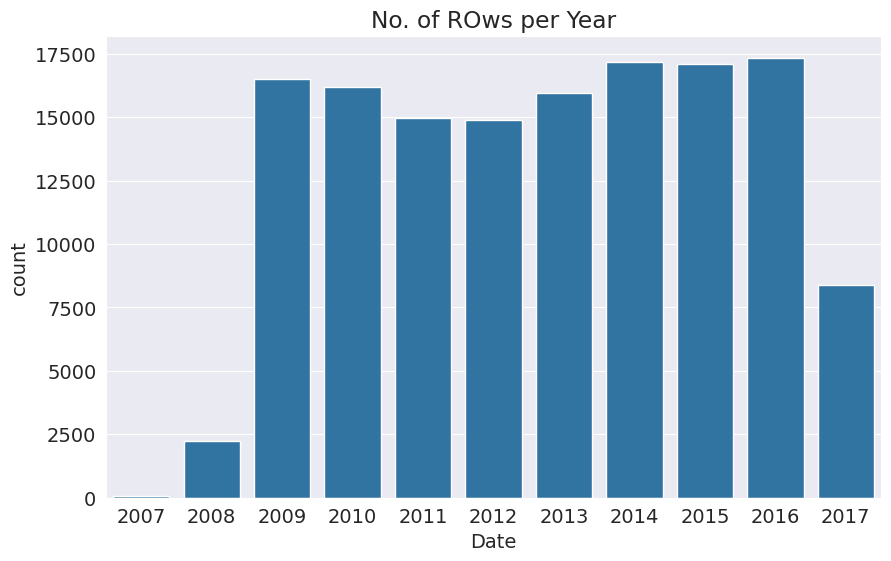

In [114]:
plt.title('No. of ROws per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

When using time data it is advice to tspread your data frames with respect to the dates

In [115]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [116]:
print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (97988, 23)
val_df.shape:  (17089, 23)
test_df.shape:  (25710, 23)


In [117]:
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 140787, dtype: int32

In [118]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [119]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [120]:
target_col

'RainTomorrow'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.  

In [121]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [122]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [123]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [124]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W           44.0          W        WNW          20.0   
1              WNW           44.0        NNW        WSW           4.0   
2              WSW           46.0          W        WSW          19.0   
3               NE           24.0         SE          E          11.0   
4                W           41.0        ENE         NW           7.0   
...            ...            ...        ...        ...           ...   
144548         SSE           43.0        ESE        SSE          24.0   
144549          NE           31.0        ENE         SW          19.0   
144550         ESE           39.0        ESE        SSE          26.0   
144551         ESE           43.0        ESE        SSW          28.0   
144552         WNW           76.0        ENE        SSW          30.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
144548          26.0         22.0         13.0       1014.1       1009.8   
144549          20.0         16.0          8.0       1012.6       1007.6   
144550           9.0         15.0          8.0       1011.9       1008.0   
144551          17.0         22.0          9.0       1014.0       1009.2   
144552          13.0         16.0          9.0       1012.1       1006.2   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  
0            8.0       NaN     16.9     21.8        No  
1            NaN       NaN     17.2     24.3        No  
2            NaN       2.0     21.0     23.2        No  
3            NaN       NaN     18.1     26.5        No  
4            7.0       8.0     17.8     29.7        No  
...          ...       ...      ...      ...       ...  
144548       NaN       NaN     23.7     31.8        No  
144549       NaN       NaN     28.9     34.8        No  
144550       NaN       NaN     29.7     35.7        No  
144551       NaN       NaN     29.8     37.2        No  
144552       NaN       NaN     30.1     37.4        No  

[97988 rows x 21 columns]

In [125]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_col = train_inputs.select_dtypes('object').columns.tolist()

In [126]:
from sklearn.impute import SimpleImputer

In [127]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
 |  
 |  Univariate imputer for completing missing values with simple strategies.
 |  
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      can be 

In [128]:
imputer = SimpleImputer(strategy='mean')

In [129]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

In [130]:
train_df[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
dtype: int64

In [131]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [132]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991)]

In [133]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [134]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6     5.472516   7.63054           44.0   
1           7.4     25.1       0.0     5.472516   7.63054           44.0   
2          12.9     25.7       0.0     5.472516   7.63054           46.0   
3           9.2     28.0       0.0     5.472516   7.63054           24.0   
4          17.5     32.3       1.0     5.472516   7.63054           41.0   
...         ...      ...       ...          ...       ...            ...   
144548     16.9     33.2       0.0     5.472516   7.63054           43.0   
144549     15.1     36.8       0.0     5.472516   7.63054           31.0   
144550     17.3     37.8       0.0     5.472516   7.63054           39.0   
144551     20.1     38.5       0.0     5.472516   7.63054           43.0   
144552     22.5     39.6       0.0     5.472516   7.63054           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  
0            1007.1  8.000000   4.49925     16.9  
1            1007.8  4.431161   4.49925     17.2  
2            1008.7  4.431161   2.00000     21.0  
3            1012.8  4.431161   4.49925     18.1  
4            1006.0  7.000000   8.00000     17.8  
...             ...       ...       ...      ...  
144548       1009.8  4.431161   4.49925     23.7  
144549       1007.6  4.431161   4.49925     28.9  
144550       1008.0  4.431161   4.49925     29.7  
144551       1009.2  4.431161   4.49925     29.8  
144552       1006.2  4.431161   4.49925     30.1  

[97988 rows x 15 columns]

In [135]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

In [136]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am']


Scaling data

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
scaler = MinMaxScaler()

In [139]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [140]:
list(scaler.data_min_)

[np.float64(-8.5),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(977.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2)]

In [141]:
list(scaler.data_max_)

[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2)]

In [142]:
raw_df.describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [143]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [144]:
train_inputs.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [145]:
from sklearn.preprocessing import OneHotEncoder

In [146]:
raw_df[categorical_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [147]:
encoder = OneHotEncoder(sparse_output=False,
                        handle_unknown='ignore'
                        
        )

In [148]:
encoder.fit(raw_df[categorical_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [149]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [150]:
encoded_cols = list(encoder.get_feature_names_out(categorical_col))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [151]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_col])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_col])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_col])

/tmp/ipykernel_59907/1746360551.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_59907/1746360551.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_59907/1746360551.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_59907/1746360551.py:1: Performance

We can verify that these new columns have been added to our training, test and validation sets.

In [152]:
pd.set_option('display.max_columns',None)

In [153]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532     36.7        No                0.0   
2499    0.888889  0.888889  0.675105     31.7        No                0.0   
2500    0.888889  0.888889  0.611814     19.5       Yes                0.0   
2501    0.888889  0.888889  0.556962     21.6       Yes                0.0   
2502    0.888889  0.888889  0.514768     22.2       Yes                0.0   
...          ...       ...       ...      ...       ...                ...   
145454  0.492351  0.499917  0.350211     20.9        No                0.0   
145455  0.492351  0.499917  0.364979     22.4        No                0.0   
145456  0.492351  0.499917  0.381857     24.5        No                0.0   
145457  0.492351  0.499917  0.415612     26.1        No                0.0   
145458  0.333333  0.222222  0.470464     26.0        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
...          

In [154]:
print('train_inputs:', train_inputs.shape)
print('train_target:', train_target.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_target: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
model = LogisticRegression(solver= 'liblinear')

In [157]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_target)

LogisticRegression(solver='liblinear')

In [158]:
len(numeric_cols)

15

In [159]:
len(encoded_cols)

102

In [160]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [161]:
len(model.coef_)

1

In [162]:
model.intercept_

array([-2.36393755])

In [163]:
weight_df = pd.DataFrame({
    'feature' : (numeric_cols + encoded_cols),
    'weight' : model.coef_.tolist()[0]
})

In [ ]:
plt.figure(figsize=(10,50))
sns.barplot(data=weight_df, x='weight', y='feature')

In [165]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols  + encoded_cols]
X_test = test_inputs[numeric_cols  + encoded_cols]

In [166]:
train_preds = model.predict(X_train)

In [167]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
accuracy_score(train_target, train_preds)

0.8519002326815528

In [170]:
from sklearn.metrics import confusion_matrix

In [171]:
confusion_matrix(train_target, train_preds, normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given set of inputs

In [172]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

Accuracy: 85.19%


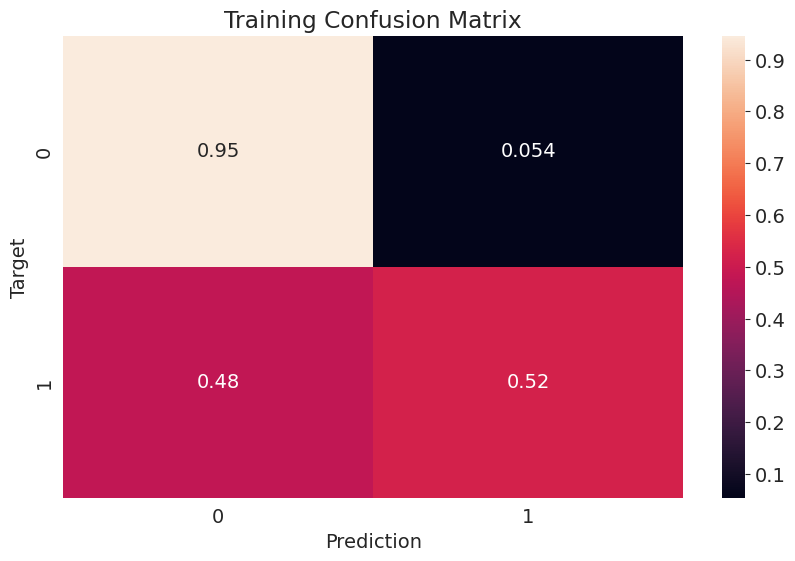

In [173]:
train_preds = predict_and_plot(X_train, train_target, 'Training')

Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 85.41%


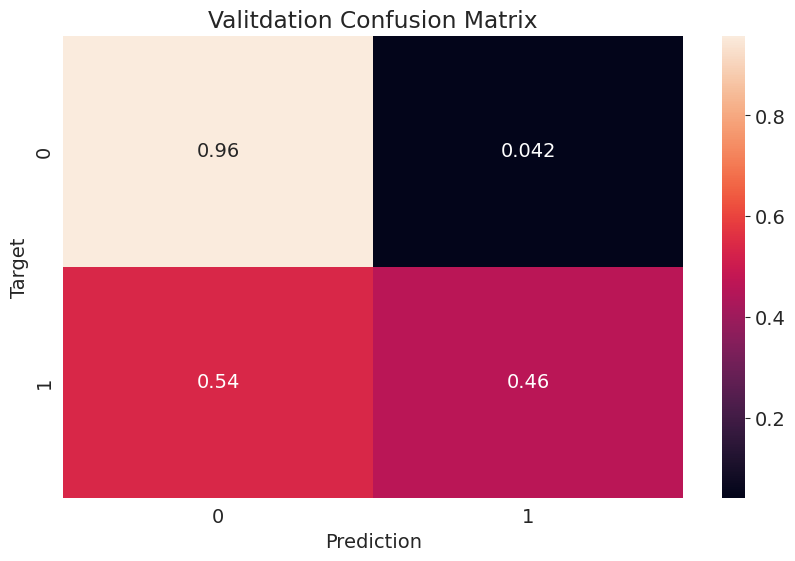

In [174]:
val_preds = predict_and_plot(X_val, val_targets, 'Valitdation')

Accuracy: 84.25%


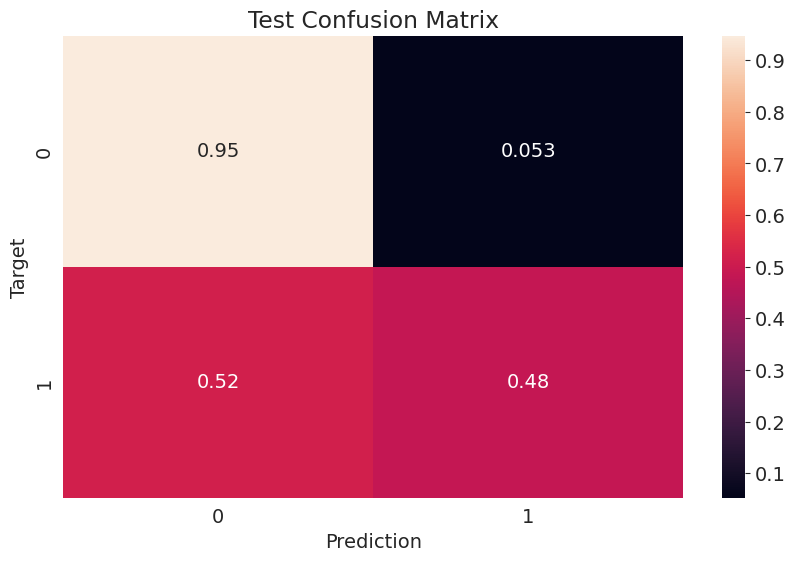

In [175]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [176]:
def random_guess(inputs):
    return np.random.choice(["No","Yes"], len(inputs))

In [177]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [179]:
accuracy_score(test_targets, random_guess(X_test))

0.49634383508362506

In [183]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

In [184]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037741  0.526244       0.372093   
2499    0.693396  0.725898  0.001078     0.037741  0.526244       0.341085   
2500    0.634434  0.527410  0.005930     0.037741  0.526244       0.325581   
2501    0.608491  0.538752  0.042049     0.037741  0.526244       0.255814   
2502    0.566038  0.523629  0.018329     0.037741  0.526244       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037741  0.526244       0.193798   
145455  0.266509  0.533081  0.000000     0.037741  0.526244       0.193798   
145456  0.285377  0.568998  0.000000     0.037741  0.526244       0.124031   
145457  0.327830  0.599244  0.000000     0.037741  0.526244       0.240310   
145458  0.384434  0.601134  0.000000     0.037741  0.526244       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am  Location_Adelaide  \
2498         0.5136  0.777778  0.333333  0.702532                0.0   
2499         0.5008  0.888889  0.888889  0.675105                0.0   
2500         0.6032  0.888889  0.888889  0.611814                0.0   
2501         0.6304  0.888889  0.888889  0.556962                0.0   
2502         0.5888  0.888889  0.888889  0.514768                0.0   
...             ...       ...       ...       ...                ...   
145454       0.7056  0.492351  0.499917  0.350211                0.0   
145455       0.6912  0.492351  0.499917  0.364979                0.0   
145456       0.6720  0.492351  0.499917  0.381857                0.0   
145457       0.6352  0.492351  0.499917  0.415612                0.0   
145458       0.6304  0.333333  0.222222  0.470464                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
...                 ...              ...                    ...   
145454              0.0              0.0                    0.0   
145455              0.0              0.0                    0.0   
145456              0.0              0.0                    0.0   
145457              0.0              0.0                    0.0   
145458              0.0              0.0                    0.0   

        Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
2498                       0.0                0.0               0.0   
2499                       0.0                0.0               0.0   
2500                       0.0                0.0               0.0   
2501                       0.0                0.0               0.0   
2502                       0.0                0.0               0.0   
...                        ...                ...  